In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import pandas as pd 

# Feature names from the file kddcup.names file to be used as cols heading
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

df = pd.read_csv("/content/gdrive/My Drive/data/kddcup.data", header=None, names = col_names)

# df=pd.read_csv('/content/gdrive/My Drive/data/kddcup.data_10_percent_corrected')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [0]:
## Data Preperation for training
# ------------------------------
def prepare_data(df):
  '''This function prepares the dataset for training. 
  All categorical data will be encoded using LabelEncoder() of Sklearn. 
  Labels of each sample will be encoded into five categories as follows: -
  
    0 - Normal connection
    1 - dos attack
    2 - probe attack
    3 - r2l attack
    4 - u2r attack
  '''
  # Encoding the categorical label to five categories:
  newlabeldf=df['label'].replace({ 'normal.' : 0, 'neptune.' : 1 ,'back.': 1, 'land.': 1, 'pod.': 1, 'smurf.': 1, 'teardrop.': 1,'mailbomb.': 1, 'apache2.': 1, 'processtable.': 1, 'udpstorm.': 1, 'worm.': 1,
                           'ipsweep.' : 2,'nmap.' : 2,'portsweep.' : 2,'satan.' : 2,'mscan.' : 2,'saint.' : 2
                           ,'ftp_write.': 3,'guess_passwd.': 3,'imap.': 3,'multihop.': 3,'phf.': 3,'spy.': 3,'warezclient.': 3,'warezmaster.': 3,'sendmail.': 3,'named.': 3,'snmpgetattack.': 3,'snmpguess.': 3,'xlock.': 3,'xsnoop.': 3,'httptunnel.': 3,
                           'buffer_overflow.': 4,'loadmodule.': 4,'perl.': 4,'rootkit.': 4,'ps.': 4,'sqlattack.': 4,'xterm.': 4})
  df['label'] = newlabeldf.astype('int')
  
  # Encoding categorical data using LabelEncoder()
  le = LabelEncoder()
  df['protocol_type'] = le.fit_transform(df['protocol_type'])
  df['service']= le.fit_transform(df['service'])
  df['flag'] = le.fit_transform(df['flag'])
  
  return df
  

In [0]:
# X = df.iloc[:,:41]
# y = df.iloc[:,-1].astype('int')


In [0]:
df = prepare_data(df)

In [0]:
df_train, df_test = train_test_split(df, stratify=df['label'], test_size=0.25)
df_train, df_val = train_test_split(df_train, stratify=df_train['label'], test_size=0.3333)

df_train.to_csv("df_train.csv",index=False)
df_val.to_csv("df_val.csv",index=False)
df_test.to_csv("df_test.csv",index=False)


In [9]:
df['label'].value_counts()

1    3883370
0     972781
2      41102
3       1126
4         52
Name: label, dtype: int64

In [11]:
df_train['label'].value_counts()

1    1941781
0     486415
2      20552
3        563
4         26
Name: label, dtype: int64

## Visualizing the catogaries (normal + four attack types)

In [0]:
from numpy import where
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,:41]
X = StandardScaler().fit_transform(X)
y = df.iloc[:,-1].astype('int')

pd.DataFrame(data = X, columns = col_names[:-1]).head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.067792,0.925753,-0.104067,0.514274,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,-0.010552,-0.004676,-0.00564,-0.011232,-0.009919,-0.027632,0.0,0.0,-0.037263,-1.521417,-1.15664,-0.46409,-0.46352,-0.24796,-0.248631,0.536987,-0.255243,-0.203633,-3.451536,-1.694315,0.599396,-0.282867,-1.022077,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
1,-0.067792,0.925753,-0.104067,0.514274,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,-0.010552,-0.004676,-0.00564,-0.011232,-0.009919,-0.027632,0.0,0.0,-0.037263,-1.521417,-1.15664,-0.46409,-0.46352,-0.24796,-0.248631,0.536987,-0.255243,-0.203633,-3.297085,-1.600011,0.599396,-0.282867,-1.146737,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
2,-0.067792,0.925753,-0.104067,0.514274,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,-0.010552,-0.004676,-0.00564,-0.011232,-0.009919,-0.027632,0.0,0.0,-0.037263,-1.521417,-1.15664,-0.46409,-0.46352,-0.24796,-0.248631,0.536987,-0.255243,-0.203633,-3.142633,-1.505707,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
3,-0.067792,0.925753,-0.104067,0.514274,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,-0.010552,-0.004676,-0.00564,-0.011232,-0.009919,-0.027632,0.0,0.0,-0.037263,-1.530800,-1.16476,-0.46409,-0.46352,-0.24796,-0.248631,0.536987,-0.255243,-0.203633,-2.988182,-1.411403,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
4,-0.067792,0.925753,-0.104067,0.514274,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,-0.010552,-0.004676,-0.00564,-0.011232,-0.009919,-0.027632,0.0,0.0,-0.037263,-1.530800,-1.16476,-0.46409,-0.46352,-0.24796,-0.248631,0.536987,-0.255243,-0.203633,-2.833731,-1.317100,0.599396,-0.282867,-1.209067,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464


In [0]:
covar_matrix = PCA(n_components = 41)
covar_matrix.fit(X)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([26. , 37.9, 46.9, 54.5, 59.2, 63.3, 66.4, 69.3, 72.2, 74.8, 77.4,
       79.9, 82.4, 84.8, 87. , 89.2, 91.2, 93.1, 94.9, 95.9, 96.8, 97.7,
       98.3, 98.8, 99.2, 99.5, 99.6, 99.7, 99.8, 99.9, 99.9, 99.9, 99.9,
       99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9])

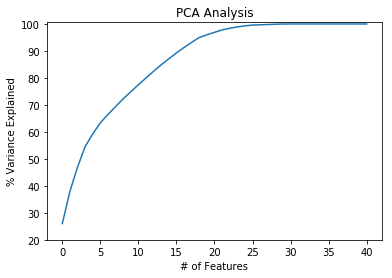

In [0]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(20,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

##Training 

In [0]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=64):
  dataframe = dataframe.copy()
  labels = dataframe.pop('label')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [0]:
# train, test = train_test_split(df, test_size=0.2)
# train, val = train_test_split(train, test_size=0.2)
# print(len(train), 'train examples')
# print(len(val), 'validation examples')
# print(len(test), 'test examples')

# batch size is a hyperparameter that defines the number of samples to work
# Adjust the batch_size as per the RAM availability before modeling.
batch_size = 10000

# creating the tf.data dataset
train_ds = df_to_dataset(df_train, batch_size=batch_size)
val_ds = df_to_dataset(df_val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(df_test, shuffle=False, batch_size=batch_size)


In [0]:
# Generating feature layer for keras sequential model.
feature_columns = []
for header in list(df.columns)[:-1]:
  feature_columns.append(feature_column.numeric_column(header))
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [20]:
# Create, compile, and train the model
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(5, activation='softmax'),
  
])

model.compile(optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model.fit(train_ds,
#           validation_data=val_ds,
#           epochs=5,
#           callbacks=[TensorBoardColabCallback(tbc)])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=1,workers=10
          )

Train on 245 steps, validate on 123 steps
245/245 [==============================] - 213s 869ms/step - loss: 200.2837 - acc: 0.9473 - val_loss: 27.9690 - val_acc: 0.9858


In [21]:
# Testing on the heldout dataset from training samples.
loss, accuracy = model.evaluate(test_ds)
print("Accuracy on heldout test dataset: ", accuracy)


123/123 [==============================] - 45s 362ms/step - loss: 93.9236 - acc: 0.9857
Accuracy on heldout test dataset:  0.9857244


In [0]:
y_true = df_test.iloc[:,-1].astype('int')
y_pred=model.predict(test_ds)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_true, y_pred.argmax(axis=1))

array([[231763,   5530,    865,   4982,     55],
       [  1050, 968856,    352,    585,      0],
       [  2575,   1214,   6486,      1,      0],
       [   255,      3,      0,     21,      2],
       [    11,      1,      1,      0,      0]])

In [19]:
print(classification_report(y_true, y_pred.argmax(axis=1)))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.98      0.99      0.99    243195
           1       1.00      1.00      1.00    970843
           2       0.89      0.62      0.73     10276
           3       0.00      0.00      0.00       281
           4       0.00      0.00      0.00        13

    accuracy                           0.99   1224608
   macro avg       0.57      0.52      0.54   1224608
weighted avg       0.99      0.99      0.99   1224608

